<a href="https://colab.research.google.com/github/victorsa42/Analise_de_dados_com_Python-/blob/main/grafico_de_multiplas_linhas_com_o_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

links para entender melhor:
* https://www.youtube.com/watch?v=t1d0gZ99G_Y
* https://www.youtube.com/watch?v=tnhjAziFT-Q
* https://matplotlib.org/stable/gallery/index.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from matplotlib.figure import Figure
from sklearn.metrics import r2_score
from scipy import stats



In [ ]:
# importar modulos
import matplotlib.pyplot as plt  #modulo grafico
import numpy as np  #modulo matematico
import pandas as pd #modulo para analise de dados
from scipy.optimize import curve_fit #biblioteca cientifica responsavel por fitar uma  curva

In [ ]:

# importar google drive e autenticação
#from google.colab import drive,auth 
#drive.mount('/content/gdrive', force_remount = True )

# importar google planilhas (sheet)
from google.colab import auth
auth.authenticate_user()
import gspread  # modulo do google sheet
from oauth2client.client import GoogleCredentials  #credenciais do google

## autenticação do modulo gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# abrir o arquivo do sheet pelo nome
wb = gc.open('dados_exp4')
wb

### abrir pelo link
# wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y8Yl6hQ9dwVGj_ouwqjKYWyssjSNir0b2EFQCVLHxh0/edit#gid=0')

sheet1 = wb.worksheet('Sheet12')
#sheet1.get_all_values()  ###pega todos os valores 
dados = sheet1.get_all_records()  ###pega todos os valores sendo a primeira linha o titulo

df = pd.DataFrame(dados)
df

,m,dx1,dx2,dx3
0,100,0.03,0.06,0.11
1,200,0.06,0.14,0.21
2,300,0.09,0.22,0.30


In [ ]:
# equção a ser usada no ajuste da curva
def func(x, k1):
    return  x*9.8*(1/k1)

def func2(x, k2):
    return  x*9.8*(1/k2)

def func3(x, k3):
    return  x*9.8*(1/k3)


In [ ]:
#x = np.array([1, 2, 2.5, 6, 7.8, 9.6])
# x= np.linspace(1,7,50)



[32.66666667]
[13.72]
[9.5944056]
1.0


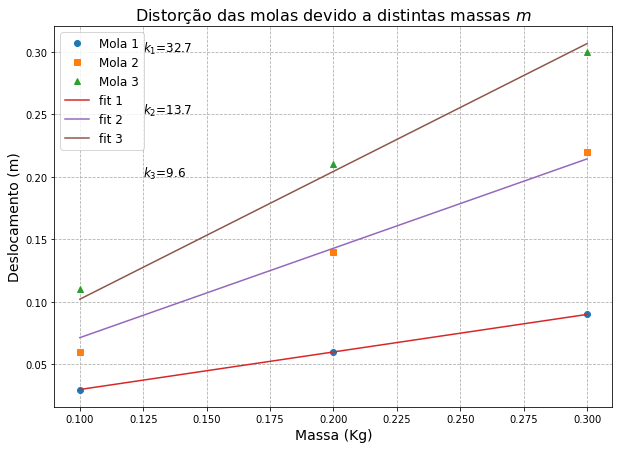

In [ ]:
#criar uma figura que sera o grafico
fig, ax = plt.subplots(figsize =(10,7))
nomefig = 'Grafico1.png'


#valores dos eixos referentes as colunas da tabela 
x = np.array(df['m'])/1000
y = np.array(df['dx1'])
y2 = np.array(df['dx2'])
y3 = np.array(df['dx3'])



#xr=np.array(df['erro Vm1C(mm/s)'])
xr=1*10**(-3)
yr=1*10**(-2)
yr2=2*10**(-2)


#ajuste
popt, pcov = curve_fit(func, x , y, p0=(1))
popt2, pcov2 = curve_fit(func2, x , y2, p0=(1))
popt3, pcov3 = curve_fit(func3, x , y3, p0=(1))


erroV = np.sqrt(np.diag(pcov)) #erro das variaveis obtidas pelo ajuste
erroV2 = np.sqrt(np.diag(pcov2))
erroV3 = np.sqrt(np.diag(pcov3))

print(popt)
print(popt2)
print(popt3)




# plotar o grafico
plt.plot(x ,y , marker='o',  label="Mola 1", ls = '', lw = '1')
plt.plot(x ,y2 ,marker='s', label="Mola 2", ls = '', lw = '1')
plt.plot(x ,y3 , marker='^', label="Mola 3", ls = '', lw = '1')



# plot do ajuste
plt.plot(x, func(x, *popt), label='fit 1') #$ \\Delta x =- \\frac{mg}{k_n}$
plt.plot(x, func2(x, *popt2), label='fit 2')
plt.plot(x, func3(x, *popt3), label='fit 3')

 

#configurações do grafico
#ax.errorbar(x,y, xerr=xr, yerr=yr, fmt=",", color="b", label='erro', capsize=2 ,ecolor='k') #barra de erro
#ax.errorbar(x,y2, xerr=xr, yerr=yr, fmt=",", color="b",  capsize=2 ,ecolor='k')
#ax.errorbar(x,y3, xerr=xr, yerr=yr2, fmt=",", color="b",  capsize=2 ,ecolor='k')



#eixos do grafico
ax.set_title('Distorção das molas devido a distintas massas $m$ ', fontsize = 16) #titulo
ax.set_xlabel('Massa (Kg)' , fontsize = 14 ) #nome do eixo x
ax.set_ylabel('Deslocamento (m)' , fontsize = 14 ) #nome do eixo y
ax.grid(ls= '--') #grid no grafico
ax.legend(fontsize = 12) #legenda do grafico
#plt.ylim((-0.15,0.2))


#calculo e texto do R^2
modelPredictions = func(x, *popt) 
absError = modelPredictions - y
r_squared = 1.0 - (np.var(absError) / np.var(y))
print(r_squared)

modelPredictions2 = func2(x, *popt2) 
absError2 = modelPredictions2 - y2
r_squared2 = 1.0 - (np.var(absError2) / np.var(y2))

modelPredictions3 = func3(x, *popt3) 
absError3 = modelPredictions3 - y3
r_squared3 = 1.0 - (np.var(absError3) / np.var(y3))





ax.text(0.125, 0.3 , r'$k_1$=%2.1f ' % tuple(popt), fontsize=12,) #caixa de texto
#ax.text(0.17, 0.112, r'$\pm $  %0.1f )' % erroV, fontsize=12,) #caixa de texto
#ax.text(0.15, 0.151, r'$R_1^2$ = %0.4f' % r_squared, fontsize=12) #caixa de texto

ax.text(0.125, 0.25 , r'$k_2$=%2.1f ' % tuple(popt2), fontsize=12)
#ax.text(0.06, 0.104, r'$\pm $  %0.1f )' % erroV2, fontsize=12)
#ax.text(0.05, 0.143, r'$R_2^2$ = %0.4f' % r_squared2, fontsize=12)

ax.text(0.125, 0.2 , r'$k_3$=%2.1f ' % tuple(popt3), fontsize=12)
#ax.text(0.06, 0.096, r'$\pm $  %0.1f )' % erroV3, fontsize=12)
#ax.text(0.05, 0.135, r'$R_3^2$ = %0.4f' % r_squared3, fontsize=12)



## salvar figura
fig.savefig(nomefig)
plt.show()

# Nova seção